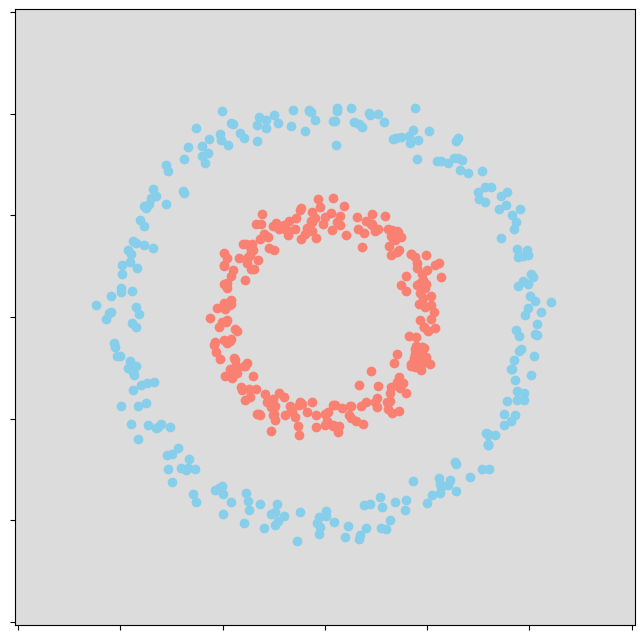

In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
#Creamos nuestros datos artificiales, donde buscaremos clasificar
#dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)
#Resolución del mapa de predicción.
res = 100
#Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
#Input con cada combo de coordenadas del mapa de predicción.
pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)
#objeto vacio a 0.5 del mapa de predicción.
PY = np.zeros((res, res)) + 0.5
#Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, PY, cmap="coolwarm", vmin=0, vmax=1)
#Visualización de la nube de datos.
plt.scatter (X[Y == 0,0], X[Y == 0,1], c="skyblue") 
plt.scatter (X[Y == 1,0], X[Y == 1,1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)

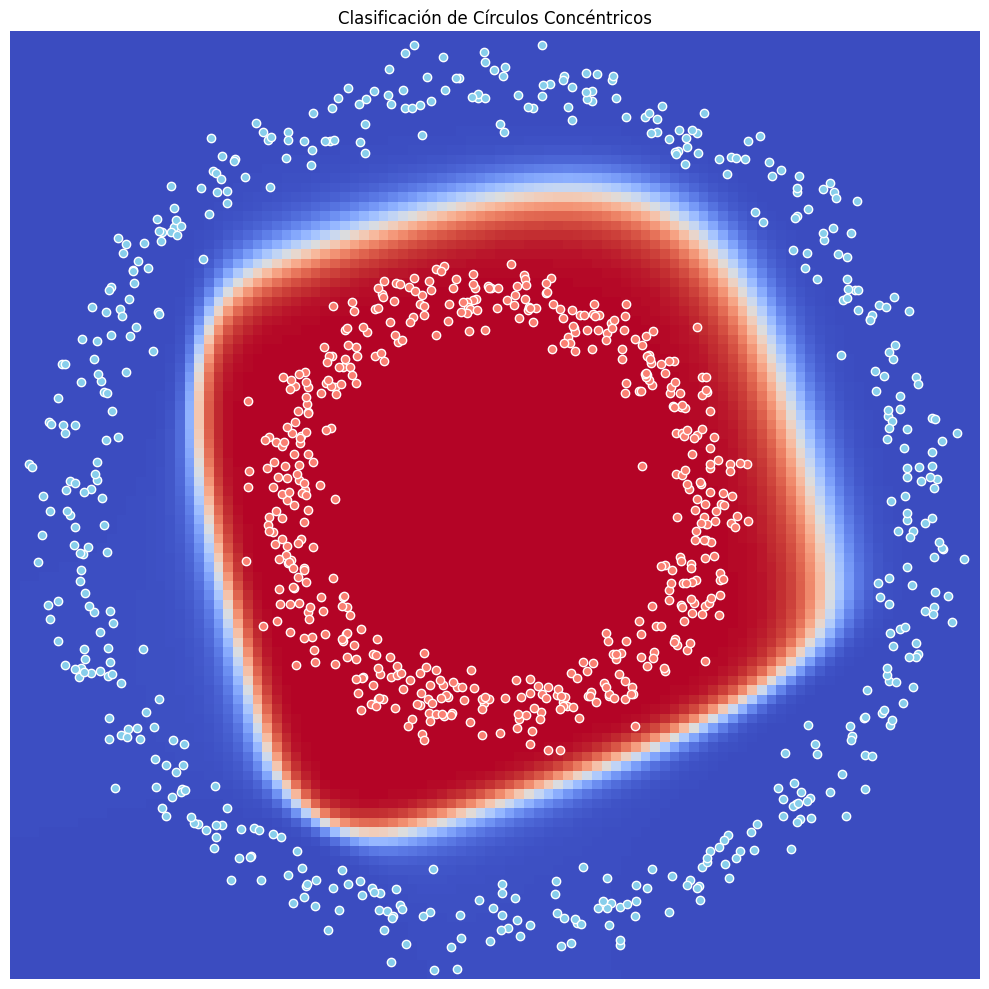

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

# Creamos nuestros datos artificiales
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)
X = StandardScaler().fit_transform(X)

# Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-2, 2, res)
_x1 = np.linspace(-2, 2, res)
xx, yy = np.meshgrid(_x0, _x1)
pX = np.c_[xx.ravel(), yy.ravel()]

# Función de activación y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Inicialización de la red neuronal
np.random.seed(42)
input_size = 2
hidden_size = 32
output_size = 1

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
bias_hidden = np.random.uniform(size=(1, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
bias_output = np.random.uniform(size=(1, output_size))

# Entrenamiento
learning_rate = 0.1
epochs = 10000

for _ in range(epochs):
    # Forward propagation
    hidden_layer = sigmoid(np.dot(X, weights_input_hidden) + bias_hidden)
    output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) + bias_output)
    
    # Backpropagation
    error = y.reshape(-1, 1) - output_layer
    d_output = error * sigmoid_derivative(output_layer)
    
    error_hidden = np.dot(d_output, weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer)
    
    # Actualización de pesos
    weights_hidden_output += np.dot(hidden_layer.T, d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += np.dot(X.T, d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Predicción en la cuadrícula
hidden_layer = sigmoid(np.dot(pX, weights_input_hidden) + bias_hidden)
pY = sigmoid(np.dot(hidden_layer, weights_hidden_output) + bias_output)

# Visualización
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, pY.reshape(res, res), cmap='coolwarm', vmin=0, vmax=1, shading='auto')
plt.scatter(X[y==0, 0], X[y==0, 1], c='skyblue', edgecolor='white')
plt.scatter(X[y==1, 0], X[y==1, 1], c='salmon', edgecolor='white')
plt.title('Clasificación de Círculos Concéntricos')
plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers


# Ajustar la forma de Y
Y = np.expand_dims(Y, axis=-1)

# Crear un tf.data.Dataset desde los datos simulados
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.shuffle(buffer_size=len(X))  # Barajar los datos
dataset = dataset.batch(32)  # Ajusta el tamaño del batch según sea necesario

# Crear el modelo
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss="mse", optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

# Entrenar el modelo
model.fit(dataset, epochs=10)


Epoch 1/10


c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4908 - loss: 0.2342  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5161 - loss: 0.2317
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4640 - loss: 0.2342
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4950 - loss: 0.2296
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4978 - loss: 0.2292
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.5272 - loss: 0.2276
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4996 - loss: 0.2293
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5495 - loss: 0.2251
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5810 - loss: 0.2259
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5892 - loss: 0.2246


In [7]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01                                                   #learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                    learning_rate_init=lr,
                                    hidden_layer_sizes=tuple(nn[1:]),
                                    verbose=True,
                                    n_iter_no_change=1000,
                                    batch_size=64)

# Y lo entrenamos con nuestros datos.
clf.fit(X, Y)

Iteration 1, loss = 0.94633361
Iteration 2, loss = 0.39306279
Iteration 3, loss = 0.14928014
Iteration 4, loss = 0.13013724
Iteration 5, loss = 0.13921754
Iteration 6, loss = 0.13321793
Iteration 7, loss = 0.12681087
Iteration 8, loss = 0.12592919
Iteration 9, loss = 0.12522409
Iteration 10, loss = 0.12522687
Iteration 11, loss = 0.12514799
Iteration 12, loss = 0.12505368
Iteration 13, loss = 0.12503217
Iteration 14, loss = 0.12504118
Iteration 15, loss = 0.12503975
Iteration 16, loss = 0.12511939
Iteration 17, loss = 0.12511787
Iteration 18, loss = 0.12507745
Iteration 19, loss = 0.12510165
Iteration 20, loss = 0.12506150
Iteration 21, loss = 0.12506122
Iteration 22, loss = 0.12510622
Iteration 23, loss = 0.12505806
Iteration 24, loss = 0.12508650
Iteration 25, loss = 0.12504397
Iteration 26, loss = 0.12503905
Iteration 27, loss = 0.12519964
Iteration 28, loss = 0.12512130
Iteration 29, loss = 0.12505878
Iteration 30, loss = 0.12507523
Iteration 31, loss = 0.12510244
Iteration 32, los

C:\Users\Simon R\AppData\Local\Temp\ipykernel_5680\3242440760.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 38, loss = 0.12506675
Iteration 39, loss = 0.12507248
Iteration 40, loss = 0.12509949
Iteration 41, loss = 0.12509046
Iteration 42, loss = 0.12506255
Iteration 43, loss = 0.12508562
Iteration 44, loss = 0.12504678
Iteration 45, loss = 0.12507271
Iteration 46, loss = 0.12505297
Iteration 47, loss = 0.12504923
Iteration 48, loss = 0.12509337
Iteration 49, loss = 0.12505594
Iteration 50, loss = 0.12503479
Iteration 51, loss = 0.12502484
Iteration 52, loss = 0.12504940
Iteration 53, loss = 0.12510996
Iteration 54, loss = 0.12505684
Iteration 55, loss = 0.12503525
Iteration 56, loss = 0.12503146
Iteration 57, loss = 0.12504080
Iteration 58, loss = 0.12506402
Iteration 59, loss = 0.12514528
Iteration 60, loss = 0.12509359
Iteration 61, loss = 0.12515232
Iteration 62, loss = 0.12506215
Iteration 63, loss = 0.12504357
Iteration 64, loss = 0.12506638
Iteration 65, loss = 0.12504932
Iteration 66, loss = 0.12517899
Iteration 67, loss = 0.12502174
Iteration 68, loss = 0.12511939
Iteratio

c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)